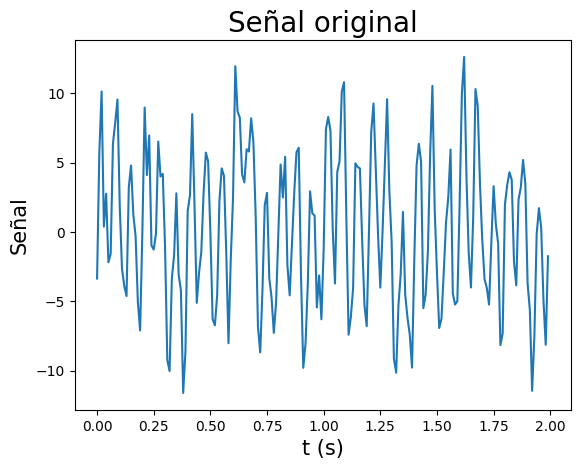

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

s=loadtxt('señal1.dat', skiprows=1)
t,y=s[:,0],s[:,1]

# Grafica de la señal en el tiempo
plt.title('Señal original', fontsize=20)
plt.plot(t,y)
plt.xlabel('t (s)', fontsize=15)
plt.ylabel('Señal', fontsize=15)
plt.show()

In [ ]:
def dft(y): #Transformada discreta de F.
  N=len(y)
  c=zeros(N//2+1, complex)
  for k in range (N//2+1):
    for n in range (N):
      c[k]+=y[n]*exp(-2j*pi*k*n/N)
  return c

ck=dft(y)       #Ck calc.
ck1=fft.fft(y)  #Ck analiti.(calc. por python)


Para graficar los coeficientes de Fourier en función de la frecuencia, se debe usar que el argumento del exponencial de las series debe ser $\omega t$ y $\omega=2\pi f$.
$$\therefore \ \ f=\frac{k}{L}$$
En este caso se tiene que $L=2s$

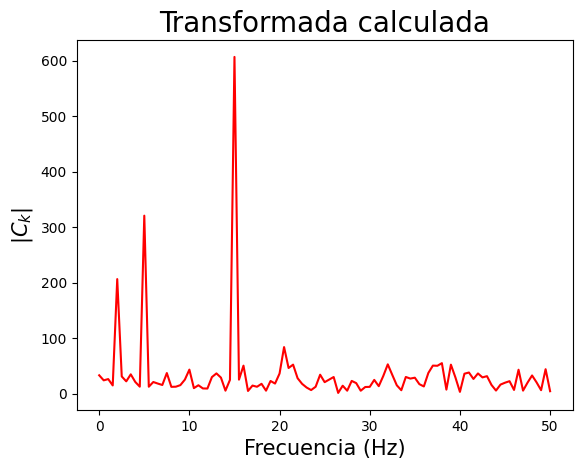

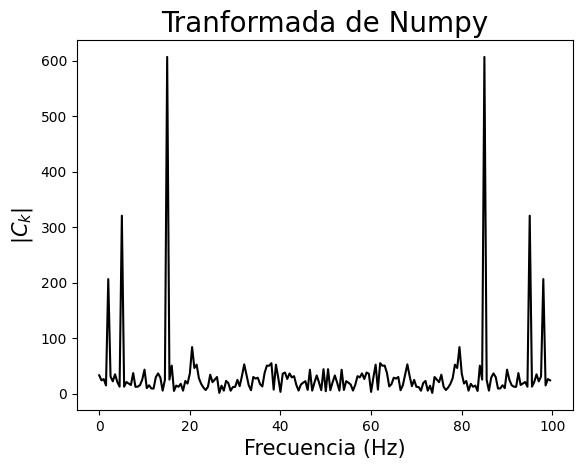

In [ ]:
f=arange(0,len(ck))/2 #Frecuencias (dominio de la DFT calculada)
f1=arange(0,len(ck1))/2 # dominio de la DFT de numpy

#Graficas
plt.title('Transformada calculada', fontsize=20)
plt.plot(f,abs(ck),'r')
plt.xlabel('Frecuencia (Hz)', fontsize=15)
plt.ylabel('$|C_k|$', fontsize=15)
plt.show()
print("")

plt.title('Tranformada de Numpy', fontsize=20)
plt.plot(arange(0,len(ck1))/2,abs(ck1),'k')
plt.xlabel('Frecuencia (Hz)', fontsize=15)
plt.ylabel('$|C_k|$', fontsize=15)
plt.show()


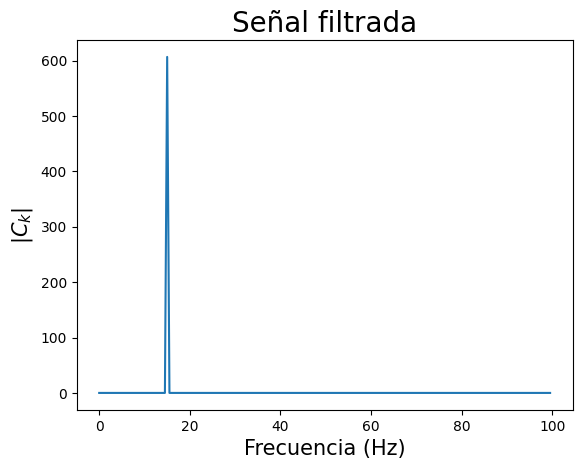

In [ ]:
ckf=zeros(len(ck1), complex)
for k in range (len(ck)):
  if k==2*15:# freq=k/L L=2
    ckf[k]=ck[k]

plt.title('Señal filtrada', fontsize=20)
plt.xlabel('Frecuencia (Hz)', fontsize=15)
plt.ylabel('$|C_k|$', fontsize=15)
plt.plot(arange(0,len(ckf))/2,abs(ckf))
plt.show()

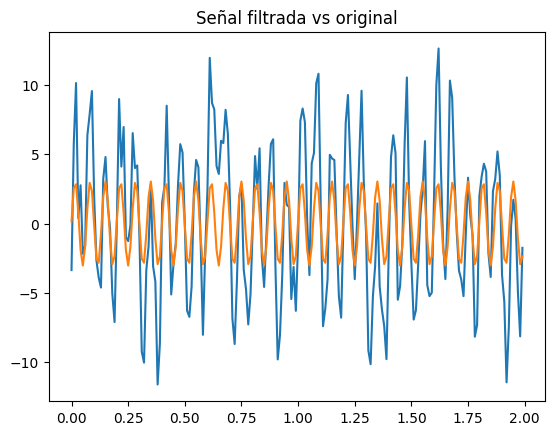

In [ ]:
yf=fft.ifft(ckf)

plt.title('Señal filtrada vs original')
plt.plot(t,y)
plt.plot(arange(0,2,0.01),real(yf))
plt.show()


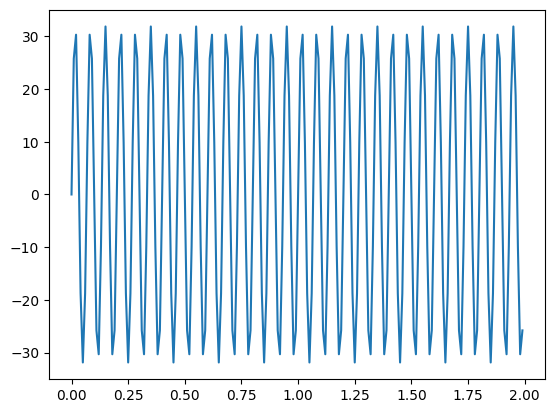

In [ ]:
#f
#Observando el gráfico, se deduce que es una función seno, a la que conocemos su frecuencia
def f1(x):
  return real(ckf[2*15])*sin((2*pi*15)*x)              #k=f*L=2*15
plt.plot(t,f1(t))
